In [1]:
#A credit card is a small thin plastic or fiber card that incorporates information about the person such as a picture or signature and the person named on it to charge purchases and services to his linked account charges which will be debited regularly.  
#Nowadays, card data is read by ATMs, swiping machines, store readers, banks, and online transactions. 
#Each card has a unique card number which is very important, its security mainly relies on the physical security of the card and also the privacy of the credit card number. 
#There is a rapid growth in credit card transactions which has led to substantial growth in scam cases. 
#Credit card fraud is expanding heavily because fraud financial loss is increasing drastically. 
#Multiple data mining and statistical techniques are used to catch fraud. 
#Therefore the detection of fraud using efficient and secured methods are very important.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Tasks to be performed:
1. Load the dataset using pandas module
2. Perform missing value analysis on the dataset.
3. From the dataset, calculate the number of genuine transactions, number of
fraud transactions and the percentage of fraud transactions.
4. Using the visualization module, visualize the genuine and fraudulent
transactions using a bar graph.
5. Using the Standard Scaler module, normalize the amount column and store
the new values in the NormalizedAmount column.
6. Split the dataset in train and test set and have a 70:30 split ratio for the model.
7. Now use a decision tree and random forest model for training on top of the
train set.
8. Compare the predictions of both models using predict().
9. Compare the accuracy of both models using score().
10.Check the performance matrix of both models and compare which model is
having the highest performance

In [3]:
import pandas as pd
from collections import Counter
import itertools
# Load the csv file
df = pd.read_csv("creditcard.csv.crdownload")
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11660,19915,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,...,-0.097462,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,10.0,0.0
11661,19915,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,...,-0.196110,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,5.0,0.0
11662,19915,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,...,-0.050745,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,10.0,0.0
11663,19915,-0.087909,0.184093,1.683910,-0.837378,-0.682605,-0.669907,-0.056222,-0.120669,0.409636,...,-0.109428,-0.054760,-0.139329,0.333267,0.072695,-0.320292,0.006423,0.010148,10.0,0.0
11664,19915,1.504229,-0.499337,0.052377,-0.576345,-0.393971,0.015149,-0.718603,-0.125852,1.023281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(11665, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11665 non-null  int64  
 1   V1      11665 non-null  float64
 2   V2      11665 non-null  float64
 3   V3      11665 non-null  float64
 4   V4      11665 non-null  float64
 5   V5      11665 non-null  float64
 6   V6      11665 non-null  float64
 7   V7      11665 non-null  float64
 8   V8      11665 non-null  float64
 9   V9      11665 non-null  float64
 10  V10     11665 non-null  float64
 11  V11     11665 non-null  float64
 12  V12     11664 non-null  float64
 13  V13     11664 non-null  float64
 14  V14     11664 non-null  float64
 15  V15     11664 non-null  float64
 16  V16     11664 non-null  float64
 17  V17     11664 non-null  float64
 18  V18     11664 non-null  float64
 19  V19     11664 non-null  float64
 20  V20     11664 non-null  float64
 21  V21     11664 non-null  float64
 22

In [7]:
df.V12 = df.V12.fillna(0)
df.V13 = df.V13.fillna(0)
df.V14 = df.V14.fillna(0)
df.V15 = df.V15.fillna(0)
df.V16 = df.V16.fillna(0)
df.V17 = df.V17.fillna(0)
df.V18 = df.V18.fillna(0)
df.V19 = df.V19.fillna(0)
df.V20 = df.V20.fillna(0)
df.V21 = df.V21.fillna(0)
df.V22 = df.V22.fillna(0)
df.V23 = df.V23.fillna(0)
df.V24 = df.V24.fillna(0)
df.V25 = df.V25.fillna(0)
df.V26 = df.V26.fillna(0)
df.V27 = df.V27.fillna(0)
df.V28 = df.V28.fillna(0)
df.Class = df.Class.fillna(0)
df.Amount =df.Amount.fillna(0)

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,...,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000
mean,7701.086069,-0.219601,0.274988,0.897990,0.281016,-0.078995,0.140055,-0.111620,-0.051877,0.893589,...,-0.061175,-0.155192,-0.034307,0.017420,0.101530,0.070624,0.007480,0.000804,62.789749,0.004201
std,5964.969525,1.561122,1.305785,1.272504,1.467970,1.184333,1.305472,1.129256,1.236992,1.182130,...,0.902518,0.624250,0.508466,0.592112,0.429708,0.560283,0.406824,0.262330,179.810014,0.064679
min,0.000000,-27.670569,-34.607649,-21.405836,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.555808,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2463.000000,-0.987193,-0.257287,0.416175,-0.615559,-0.680719,-0.622413,-0.583742,-0.186419,0.181510,...,-0.268932,-0.545390,-0.172764,-0.332771,-0.146721,-0.346882,-0.080622,-0.015512,5.000000,0.000000
50%,6308.000000,-0.347783,0.262619,0.950034,0.215393,-0.179654,-0.147786,-0.088491,0.011665,0.880826,...,-0.130071,-0.129165,-0.044471,0.073086,0.139605,0.008967,-0.003814,0.015396,15.950000,0.000000
75%,11898.000000,1.159319,0.888750,1.616224,1.153380,0.348187,0.508886,0.439387,0.267067,1.570361,...,0.023231,0.235438,0.076756,0.402511,0.374836,0.417627,0.108430,0.073957,50.000000,0.000000
max,19915.000000,1.960497,9.067613,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.599543,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [10]:
#calculate the number of genuine transactions
non_fraud = len(df[df.Class ==0])
print("Number of Genuine transactions: ", non_fraud)

Number of Genuine transactions:  11616


In [11]:
# calculate the number of fraud transactions
fraud = len(df[df.Class ==1])
print("No of Fraud Transcations: " ,fraud)

No of Fraud Transcations:  49


In [12]:
# calculate the percentage of fraud transactions
fraud_percent = (fraud /(fraud+non_fraud))*100
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Percentage of Fraud transactions: 0.4201


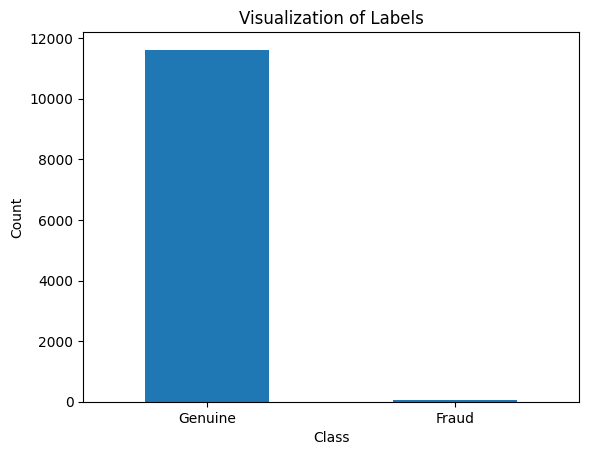

In [13]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(["Amount", "Time"], inplace= True, axis= 1)
Y = df["Class"]
X = df.drop(["Class"], axis= 1)

In [18]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)


Shape of train_X:  (8165, 28)
Shape of test_X:  (3500, 28)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
decision_tree = DecisionTreeClassifier()
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [20]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.91428571428571
Decision Tree Score:  99.94285714285715


In [21]:
predictions_dt[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [22]:
predictions_rf[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [23]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [24]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[3483    0]
 [   2   15]]


In [25]:
metrics(test_Y, predictions_dt)

Accuracy: 0.99943
Precision: 1.00000
Recall: 0.88235
F1-score: 0.93750
